<a href="https://colab.research.google.com/github/JoaoLucasAbreu/Forecasting_Data/blob/main/Times_Series/Flights_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Data from a Linear Regression Model

Linear regression is widely used in practice and adapts naturally to even complex forecasting tasks.

The linear regression algorithm learns how to make a weighted sum from its input features. For two features, we would have:


In [ ]:
#target = weight_1 * feature_1 + weight_2 * feature_2 + bias

During training, the regression algorithm learns values for the parameters weight_1, weight_2, and bias that best fit the target. (This algorithm is often called ordinary least squares since it chooses values that minimize the squared error between the target and the predictions.) The weights are also called regression coefficients and the bias is also called the intercept because it tells you where the graph of this function crosses the y-axis.

There are two kinds of features unique to time series: **time-step features** and **lag features**.

## Setting Up

Importing all libraries which is going to used in this project.

In [107]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: ignored

Loading and making a local DataFrame of the seaborn DataSet.

In [93]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Data Analysis

In [6]:
flights.shape

(144, 3)

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


## Data Visualization and Analysis

In [22]:
flights_wide = flights.pivot('month', 'year', 'passengers')
flights_wide

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


### **Barplot correlation  between month and average passengers over the years**

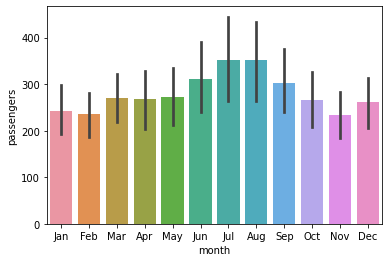

In [16]:
sns.barplot(data = flights, x ='month', y='passengers')

### **Lineplot**

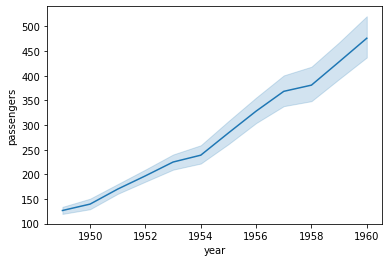

In [37]:
sns.lineplot(data=flights, x = 'year', y = 'passengers') 

### **Heatmap**

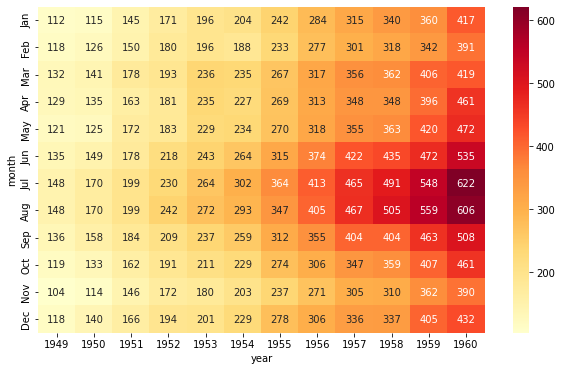

In [43]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = flights_wide, annot = True, fmt='.0f', cmap="YlOrRd")

## Time Step Feature

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the time dummy, which counts off time steps in the series from beginning to end.

In [94]:
flights['step'] = np.arange(len(flights.index)) # Adding time step feature
flights.head()


,year,month,passengers,step
0,1949,Jan,112,0
1,1949,Feb,118,1
2,1949,Mar,132,2
3,1949,Apr,129,3
4,1949,May,121,4


In [95]:
flights['date'] = flights['year'].astype(str) + "-" + flights['month'].astype(str)
flights.head()

,year,month,passengers,step,date
0,1949,Jan,112,0,1949-Jan
1,1949,Feb,118,1,1949-Feb
2,1949,Mar,132,2,1949-Mar
3,1949,Apr,129,3,1949-Apr
4,1949,May,121,4,1949-May


In [96]:
flights = flights[["date", "year", "month", "passengers", "step"]]
flights.head()

,date,year,month,passengers,step
0,1949-Jan,1949,Jan,112,0
1,1949-Feb,1949,Feb,118,1
2,1949-Mar,1949,Mar,132,2
3,1949-Apr,1949,Apr,129,3
4,1949-May,1949,May,121,4


In [130]:
# flights = flights.drop(columns = ['year', 'month'])
# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
flights = flights.set_index("date")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
# flights = flights.to_period()

In [122]:
flights.head()

,passengers,step
date,,
1949-Jan,112,0
1949-Feb,118,1
1949-Mar,132,2
1949-Apr,129,3
1949-May,121,4


In [125]:
from sklearn.linear_model import LinearRegression

# Training Data
X = flights.loc[:, ['step']] # Features
y = flights.loc[:, 'passengers'] # Target

# Model
fl_model = LinearRegression()
fl_model.fit(X, y)

# Store the fitted values as a time series with the same time index as the training data
y_prediction = pd.Series(fl_model.predict(X), index = X.index)

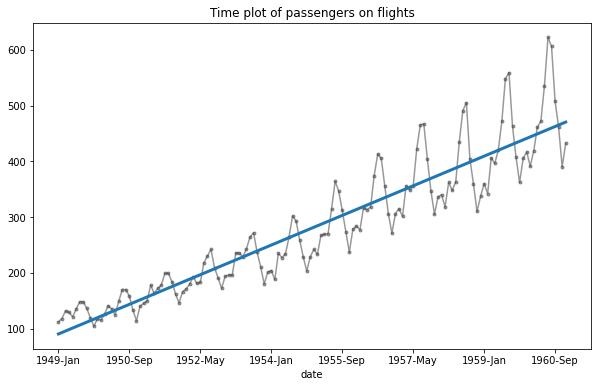

In [138]:
plot_params = {
 'color': '0.2',
 'style': '.-',
 'markeredgecolor': '0.25',
 'markerfacecolor': '0.25',
 'legend': False}

plt.figure(figsize = (10, 6))

ax = y.plot(**plot_params, alpha=0.5)
ax = y_prediction.plot(ax=ax, linewidth=3)
ax.set_title('Time plot of passengers on flights');

## Lag Feature